In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score

In [22]:
df = pd.read_csv('/Users/duffybear/Documents/Krannert/spring_1/IT management/project/result_detailed.csv')

In [23]:
df.columns[:-1]

Index([u'listing_id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'thumbnail_url',
       u'medium_url', u'picture_url', u'xl_picture_url', u'host_id',
       u'host_url', u'host_name', u'host_since', u'host_location',
       u'host_about', u'host_response_time', u'host_response_rate',
       u'host_acceptance_rate', u'host_is_superhost', u'host_thumbnail_url',
       u'host_picture_url', u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'property_type', u'room_type',
       u'accommod

In [24]:
cols = ['price','accommodates','bedrooms','beds','neighbourhood_cleansed','room_type','cancellation_policy',
        'instant_bookable','reviews_per_month','number_of_reviews','availability_30',
        'review_scores_rating','sentiment_compound','sentiment_neg','sentiment_neu','sentiment_pos']


In [25]:
df = pd.read_csv('/Users/duffybear/Documents/Krannert/spring_1/IT management/project/result_detailed.csv',usecols=cols)

In [26]:
df.isnull().values.any()

True

In [27]:
#rows with NaN
df[df.isnull().any(axis=1)]

,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,sentiment_compound,sentiment_neg,sentiment_neu,sentiment_pos
3069,Belltown,Entire home/apt,2,NaN,1.0,$80.00,25,170,94.0,t,strict,5.82,0.0000,0.000,1.000,0.000
3070,Belltown,Entire home/apt,2,NaN,1.0,$80.00,25,170,94.0,t,strict,5.82,0.4416,0.066,0.840,0.095
3071,Belltown,Entire home/apt,2,NaN,1.0,$80.00,25,170,94.0,t,strict,5.82,0.9648,0.000,0.532,0.468
3072,Belltown,Entire home/apt,2,NaN,1.0,$80.00,25,170,94.0,t,strict,5.82,0.2006,0.119,0.710,0.172
3073,Belltown,Entire home/apt,2,NaN,1.0,$80.00,25,170,94.0,t,strict,5.82,0.9567,0.000,0.423,0.577
3074,Belltown,Entire home/apt,2,NaN,1.0,$80.00,25,170,94.0,t,strict,5.82,0.9796,0.046,0.610,0.344
3075,Belltown,Entire home/apt,2,NaN,1.0,$80.00,25,170,94.0,t,strict,5.82,0.9876,0.000,0.691,0.309
3076,Belltown,Entire home/apt,2,NaN,1.0,$80.00,25,170,94.0,t,strict,5.82,0.9259,0.000,0.697,0.303
3077,Belltown,Entire home/apt,2,NaN,1.0,$80.00,25,170,94.0,t,strict,5.82,0.9093,0.036,0.782,0.183
3078,Belltown,Entire home/apt,2,NaN,1.0,$80.00,25,170,94.0,t,strict,5.82,0.9684,0.000,0.687,0.313


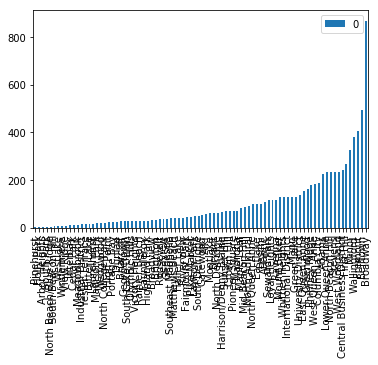

In [28]:
nb_counts = Counter(df.neighbourhood_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar')

In [29]:
df.isnull().sum()

neighbourhood_cleansed     0
room_type                  0
accommodates               0
bedrooms                  28
beds                       0
price                      0
availability_30            0
number_of_reviews          0
review_scores_rating       3
instant_bookable           0
cancellation_policy        0
reviews_per_month          0
sentiment_compound         0
sentiment_neg              0
sentiment_neu              0
sentiment_pos              0
dtype: int64

In [30]:
df[df['review_scores_rating'].isnull()]
avg_score = round(np.mean(df['review_scores_rating']),3)

In [31]:
# fixup the missing value for bedrooms and review_scores_rating
df['bedrooms'] = df['bedrooms'].fillna(0)
df['review_scores_rating'] = df['review_scores_rating'].fillna(avg_score)

#double che
df.isnull().sum()

neighbourhood_cleansed    0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
price                     0
availability_30           0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
cancellation_policy       0
reviews_per_month         0
sentiment_compound        0
sentiment_neg             0
sentiment_neu             0
sentiment_pos             0
dtype: int64

In [32]:
# remove the $ from the price and convert to float
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)

In [33]:
df['neighbourhood_cleansed'].value_counts()

Broadway                     870
Belltown                     493
Fremont                      406
Wallingford                  383
Minor                        326
First Hill                   269
Central Business District    243
Stevens                      236
West Woodland                236
North Beacon Hill            235
Lower Queen Anne             233
Adams                        226
Columbia City                189
West Queen Anne              185
Phinney Ridge                178
Greenwood                    164
East Queen Anne              154
University District          139
Green Lake                   130
Mann                         130
International District       129
Whittier Heights             129
Mount Baker                  128
Ravenna                      118
Loyal Heights                117
Seward Park                  115
Atlantic                     109
Leschi                       100
Eastlake                      99
North Queen Anne              98
          

In [34]:
df['cancellation_policy'].value_counts()

moderate    3679
strict      3408
flexible    1396
Name: cancellation_policy, dtype: int64

In [35]:
df.isnull().values.any()

False

In [36]:

n_dummies = pd.get_dummies(df.neighbourhood_cleansed)
rt_dummies = pd.get_dummies(df.room_type)
xcl_dummies = pd.get_dummies(df.cancellation_policy)

# convert boolean column to a single boolean value indicating whether this listing has instant booking available
ib_dummies = pd.get_dummies(df.instant_bookable, prefix="instant")
ib_dummies = ib_dummies.drop('instant_f', axis=1)

# replace the old columns with our new one-hot encoded ones
alldata = pd.concat((df.drop(['neighbourhood_cleansed', \
    'room_type', 'cancellation_policy', 'instant_bookable'], axis=1), \
    n_dummies.astype(int), rt_dummies.astype(int), \
    xcl_dummies.astype(int), ib_dummies.astype(int)), \
    axis=1)
allcols = alldata.columns

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


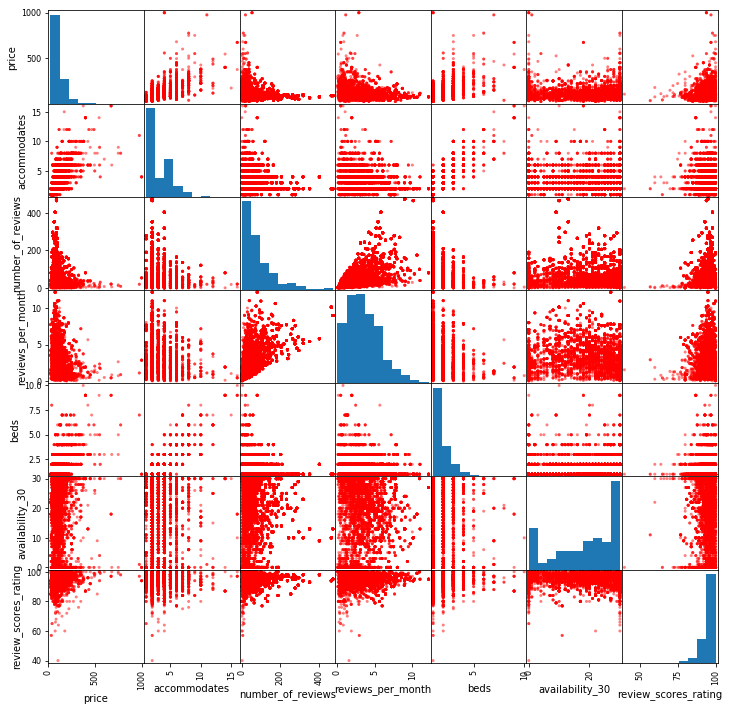

In [37]:
scattercols = ['price','accommodates', 'number_of_reviews', 'reviews_per_month', 'beds', 'availability_30', 'review_scores_rating']
axs = pd.scatter_matrix(alldata[scattercols],
                        figsize=(12, 12), c='red')# get feature encoding for categorical variables

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Text(0.5,0,u'Median Absolute Error')

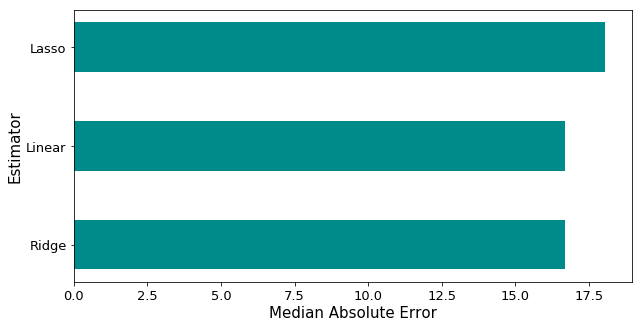

In [38]:
rs = 1
ests = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(),
        ]

ests_labels = np.array(['Linear', 'Ridge', 'Lasso'])
errvals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'], axis=1),
                                                    alldata.price, test_size=0.2, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    y_pred = e.predict(X_test)
    this_err = metrics.median_absolute_error(y_test, y_pred)
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(10,5))
plt.barh(pos, errvals[srt], align='center',height =0.5, color='darkcyan')
plt.yticks(pos, ests_labels[srt],fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Estimator',fontsize=15)
plt.xlabel('Median Absolute Error' ,fontsize=15)

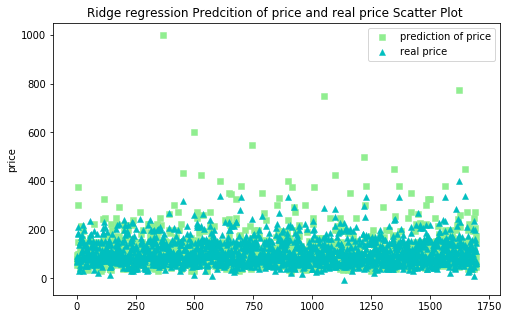

explained_variance_score: 0.579
mean_absolute_error: 24.827
mean_squared_error: 1916.59
median_absolute_error: 16.695
R square: 0.579


In [39]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
model = regr.fit(X_train,y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
predict = y_test.to_frame().reset_index()
del predict['index']
predict['prediction']=y_pred
predict


# Plot outputs linear
fig = plt.figure(figsize=(8,5))  
ax1 = fig.add_subplot(111)  
#title
ax1.set_title('Scatter Plot')  

plt.ylabel('price')  

#scatter
ax1.set_title('Ridge regression Predcition of price and real price Scatter Plot ')  
ax1.scatter(predict.index, predict['price'], color='lightgreen',linewidth=0.5,marker = 's', label = 'prediction of price')
ax1.scatter(predict.index, predict['prediction'], color='c', linewidth=0.5,marker='^',label = 'real price')  
plt.legend()
plt.show()  

score_1=metrics.explained_variance_score(y_test,y_pred)
print 'explained_variance_score:',round(score_1,3)
mbe_1=metrics.mean_absolute_error(y_test,y_pred)
print 'mean_absolute_error:',round(mbe_1,3)
mse_1 = metrics.mean_squared_error(y_test,y_pred)
print 'mean_squared_error:',round(mse_1,3)
this_err_1 = metrics.median_absolute_error(y_test,y_pred)
print 'median_absolute_error:',round(this_err_1,3)
r2_1 = r2_score(y_test, y_pred)
print 'R square:',round(r2_1,3)





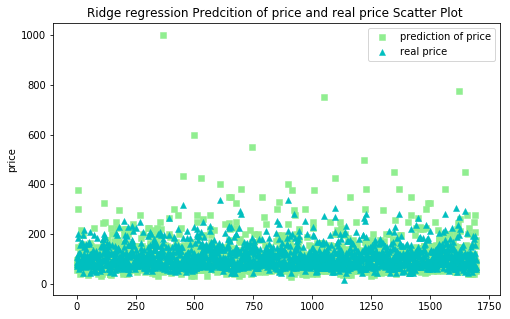

explained_variance_score: 0.488
mean_absolute_error: 27.369
mean_squared_error: 2328.45
median_absolute_error: 18.05
R square: 0.488


In [40]:
regr = linear_model.Lasso()

# Train the model using the training sets
model = regr.fit(X_train,y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
predict = y_test.to_frame().reset_index()
del predict['index']
predict['prediction']=y_pred
predict


# Plot outputs linear
fig = plt.figure(figsize=(8,5))  
ax1 = fig.add_subplot(111)  
#title
ax1.set_title('Scatter Plot')  

plt.ylabel('price')  

#scatter
ax1.set_title('Ridge regression Predcition of price and real price Scatter Plot ')  
ax1.scatter(predict.index, predict['price'], color='lightgreen',linewidth=0.5,marker = 's', label = 'prediction of price')
ax1.scatter(predict.index, predict['prediction'], color='c', linewidth=0.5,marker='^',label = 'real price')  
plt.legend()
plt.show()  

score_2=metrics.explained_variance_score(y_test,y_pred)
print 'explained_variance_score:',round(score_2,3)
mbe_2=metrics.mean_absolute_error(y_test,y_pred)
print 'mean_absolute_error:',round(mbe_2,3)
mse_2 = metrics.mean_squared_error(y_test,y_pred)
print 'mean_squared_error:',round(mse_2,3)
this_err_2 = metrics.median_absolute_error(y_test,y_pred)
print 'median_absolute_error:',round(this_err_2,3)
r2_2 = r2_score(y_test, y_pred)
print 'R square:',round(r2_2,3)








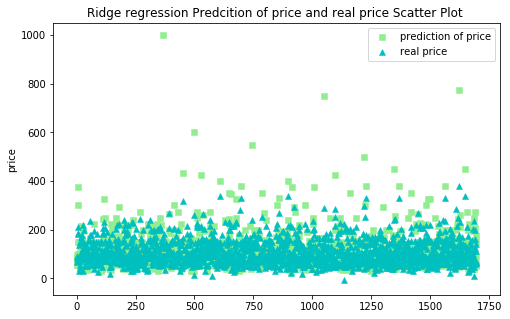

explained_variance_score: 0.577
mean_absolute_error: 24.809
mean_squared_error: 1923.681
median_absolute_error: 16.68
R square: 0.577


In [41]:
regr = linear_model.Ridge()

# Train the model using the training sets
model = regr.fit(X_train,y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
predict = y_test.to_frame().reset_index()
del predict['index']
predict['prediction']=y_pred
predict
# Plot outputs linear
fig = plt.figure(figsize=(8,5))  
ax1 = fig.add_subplot(111)  
#title
ax1.set_title('Scatter Plot')  

plt.ylabel('price')  

#scatter
ax1.set_title('Ridge regression Predcition of price and real price Scatter Plot ')  
ax1.scatter(predict.index, predict['price'], color='lightgreen',linewidth=0.5,marker = 's', label = 'prediction of price')
ax1.scatter(predict.index, predict['prediction'], color='c', linewidth=0.5,marker='^',label = 'real price')  
plt.legend()
plt.show()  


score_3=metrics.explained_variance_score(y_test,y_pred)
print 'explained_variance_score:',round(score_3,3)
mbe_3=metrics.mean_absolute_error(y_test,y_pred)
print 'mean_absolute_error:',round(mbe_3,3)
mse_3 = metrics.mean_squared_error(y_test,y_pred)
print 'mean_squared_error:',round(mse_3,3)
this_err_3 = metrics.median_absolute_error(y_test,y_pred)
print 'median_absolute_error:',round(this_err_3,3)
r2_3 = r2_score(y_test, y_pred)
print 'R square:',round(r2_3,3)







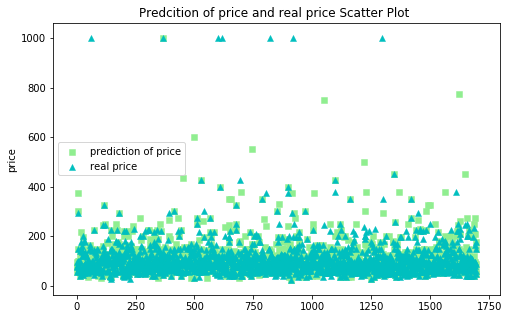

explained_variance_score: -0.075
mean_absolute_error: 18.404
mean_squared_error: 4890.958
median_absolute_error: 0.0
R square: -0.075


In [42]:
from sklearn import neighbors
import sklearn

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

predict = y_test.to_frame().reset_index()
del predict['index']
predict['prediction']=y_pred
predict

# Plot outputs linear
fig = plt.figure(figsize=(8,5))  
ax1 = fig.add_subplot(111)  
#title
ax1.set_title('Scatter Plot')  

plt.ylabel('price')  

#scatter
ax1.set_title('Predcition of price and real price Scatter Plot ')  
ax1.scatter(predict.index, predict['price'], color='lightgreen',linewidth=0.5,marker = 's', label = 'prediction of price')
ax1.scatter(predict.index, predict['prediction'], color='c', linewidth=0.5,marker='^',label = 'real price')  
plt.legend()
plt.show()  

score_4=metrics.explained_variance_score(y_test,y_pred)
print 'explained_variance_score:',round(score_4,3)
mbe_4=metrics.mean_absolute_error(y_test,y_pred)
print 'mean_absolute_error:',round(mbe_4,3)
mse_4 = metrics.mean_squared_error(y_test,y_pred)
print 'mean_squared_error:',round(mse_4,3)
this_err_4 = metrics.median_absolute_error(y_test,y_pred)
print 'median_absolute_error:',round(this_err_4,3)
r2_4 = r2_score(y_test, y_pred)
print 'R square:',round(r2_4,3)


Text(0.5,1,u'Explained Variance Score for different estimator')

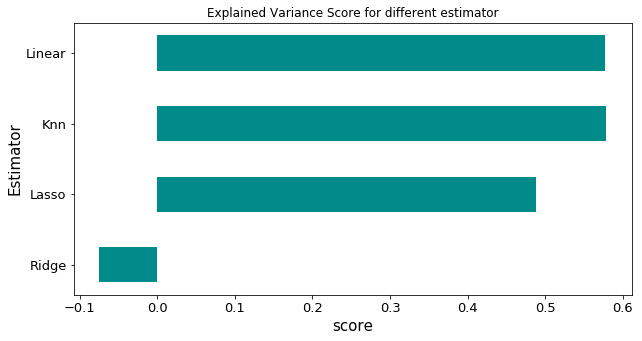

In [23]:
#explained_variance_score
rows = ['Linear','Lasso','Ridge','Knn']
score = [score_1,score_2,score_3,score_4]
plt.figure(figsize=(10,5))
plt.barh(rows ,score, align='center',height =0.5, color='darkcyan')
plt.yticks(rows,fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Estimator',fontsize=15)
plt.xlabel('score' ,fontsize=15)
plt.title("Explained Variance Score for different estimator")

In [24]:
score

[0.57866367893704207,
 0.48808771120670047,
 0.57710186200326008,
 -0.074810413914608631]

Text(0.5,1,u'Mean Absolute Error: for different estimator')

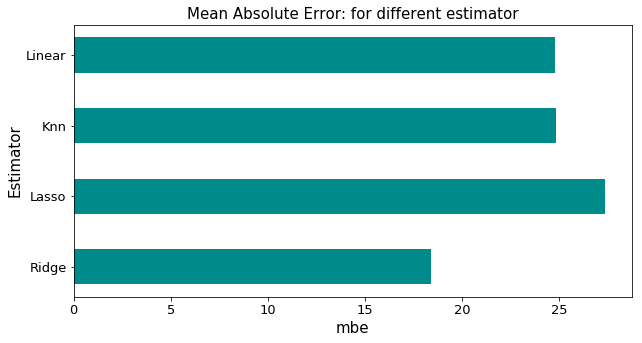

In [25]:
#mean_absolute_error:
rows = ['Linear','Lasso','Ridge','Knn']
mbe = [mbe_1,mbe_2,mbe_3,mbe_4]
plt.figure(figsize=(10,5))
plt.barh(rows ,mbe, align='center',height =0.5, color='darkcyan')
plt.yticks(rows,fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Estimator',fontsize=15)
plt.xlabel('mbe' ,fontsize=15)
plt.title("Mean Absolute Error: for different estimator",fontsize=15)


In [26]:
mbe


[24.826752045324369,
 27.368734263526253,
 24.809483872402229,
 18.404242781378905]

Text(0.5,1,u'Mean Square Error for different estimator')

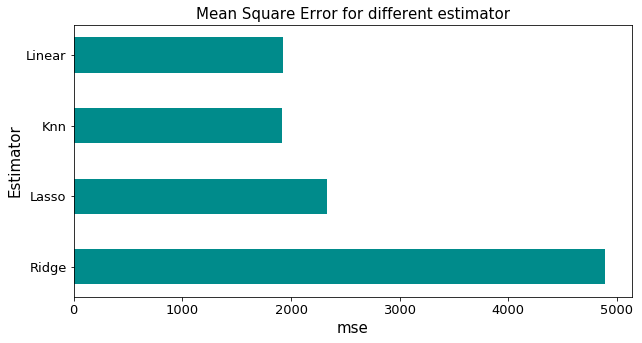

In [27]:
#mean_squared_error:
rows = ['Linear','Lasso','Ridge','Knn']
mse = [mse_1,mse_2,mse_3,mse_4]
plt.figure(figsize=(10,5))
plt.barh(rows ,mse, align='center',height =0.5, color='darkcyan')
plt.yticks(rows,fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Estimator',fontsize=15)
plt.xlabel('mse' ,fontsize=15)
plt.title("Mean Square Error for different estimator",fontsize=15)


Text(0.5,1,u'Median Absolute Error for different estimator')

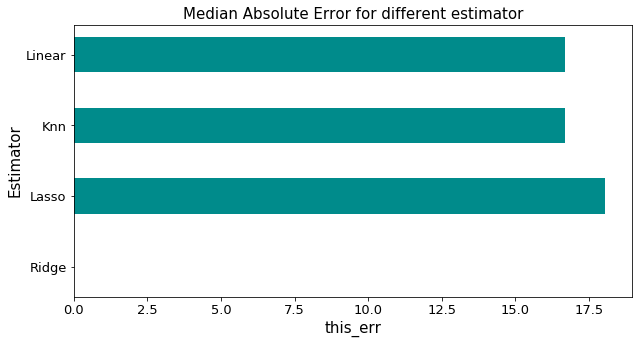

In [28]:
#median_absolute_error:
rows = ['Linear','Lasso','Ridge','Knn']
this_err = [this_err_1,this_err_2,this_err_3,this_err_4]
plt.figure(figsize=(10,5))
plt.barh(rows ,this_err, align='center',height =0.5, color='darkcyan')
plt.yticks(rows,fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Estimator',fontsize=15)
plt.xlabel('this_err' ,fontsize=15)
plt.title("Median Absolute Error for different estimator",fontsize=15)


In [29]:
this_err

[16.6949908966875, 18.049525997290118, 16.679909281763656, 0.0]

Text(0.5,1,u' R2 for different estimator')

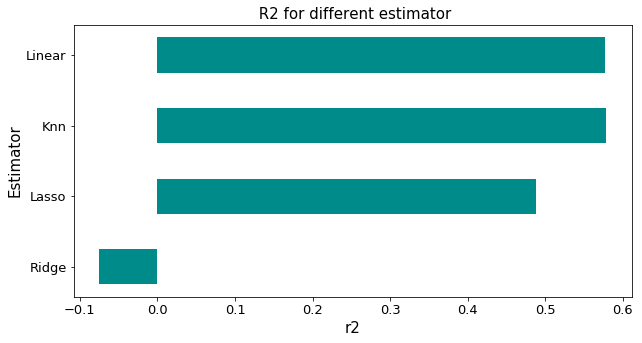

In [30]:
#R squres:
rows = ['Linear','Lasso','Ridge','Knn']
r2 = [r2_1,r2_2,r2_3,r2_4]
plt.figure(figsize=(10,5))
plt.barh(rows ,r2, align='center',height =0.5, color='darkcyan')
plt.yticks(rows,fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Estimator',fontsize=15)
plt.xlabel('r2' ,fontsize=15)
plt.title(" R2 for different estimator",fontsize=15)


In [31]:
result = pd.DataFrame(rows)
result.rename(columns={0: 'estimator'}, inplace=True)

In [32]:
result['explained variance score'] =score
result['mean absolute error'] =mbe
result['mean squared error'] =mse
result['R square'] =r2
result

,estimator,explained variance score,mean absolute error,mean squared error,R square
0,Linear,0.578664,24.826752,1916.590161,0.578620
1,Lasso,0.488088,27.368734,2328.450178,0.488069
2,Ridge,0.577102,24.809484,1923.680651,0.577062
3,Knn,-0.074810,18.404243,4890.958161,-0.075321


In [33]:
n_est = 300

tuned_parameters = {
    "n_estimators": [ n_est ],
    "max_depth" : [ 4 ],
    "learning_rate": [ 0.01 ],
    "min_samples_split" : [ 1.0 ],
    "loss" : [ 'ls', 'lad' ]
}

gbr = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(gbr, cv=3, param_grid=tuned_parameters,
        scoring='median_absolute_error')
preds = clf.fit(X_train, y_train)
best = clf.best_estimator_

/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda2/lib/python2.7

Text(0,0.5,u'Least Absolute Deviation')

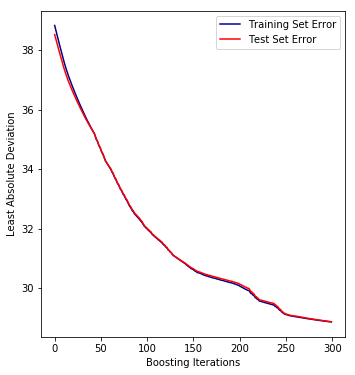

In [34]:
# plot error for each round of boosting
test_score = np.zeros(n_est, dtype=np.float64)

train_score = best.train_score_
for i, y_pred in enumerate(best.staged_predict(X_test)):
    test_score[i] = best.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(n_est), train_score, 'darkblue', label='Training Set Error')
plt.plot(np.arange(n_est), test_score, 'red', label='Test Set Error')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Least Absolute Deviation')

Text(0.5,1,u'Variable Importance witt sentiments')

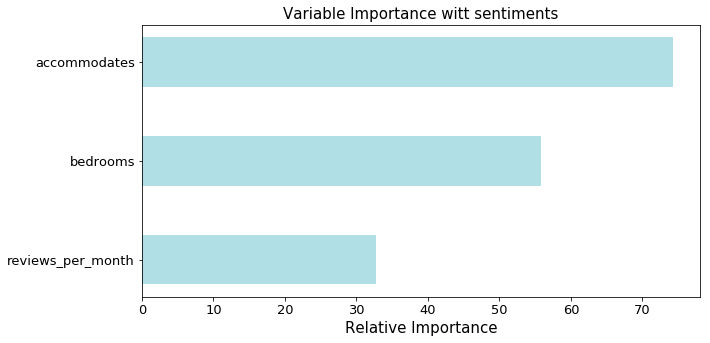

In [35]:
feature_importance = best.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X_train.columns[sorted_idx]
# plt.figure(figsize=(8,12))
# plt.barh(pos, pvals, align='center')
# plt.yticks(pos, pcols)
# plt.xlabel('Relative Importance')
# plt.title('VariableImportance')

a=list(pvals)[100:-1]
b=list(pcols)[100:-1]
c=list(pos)[100:-1]

plt.figure(figsize=(10,5))
plt.barh(c, a, align='center',linewidth=1,color = 'powderblue',height =0.5)
plt.xticks(fontsize=13)
plt.yticks(c, b,fontsize=13)
plt.xlabel('Relative Importance',fontsize=15)
plt.title('Variable Importance witt sentiments',fontsize=15)
